In [5]:
from cassandra.cluster import Cluster, PlainTextAuthProvider
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})

auth_provider = PlainTextAuthProvider(username='cassandra', password='cassandra')
cluster = Cluster(["localhost"], port=9042, auth_provider=auth_provider)
session = cluster.connect('batchkeyspace')

def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)

session.row_factory = pandas_factory

In [6]:
rows = session.execute("SELECT * FROM max_consec_delay_year")
max_consec_delay_year = rows._current_rows
rows = session.execute("SELECT * FROM max_consec_delay_year_src_dest")
max_consec_delay_year_src_dest = rows._current_rows

rows = session.execute("SELECT * FROM dist_total")
dist_total = rows._current_rows
rows = session.execute("SELECT * FROM dist_year")
dist_year = rows._current_rows
rows = session.execute("SELECT * FROM dist_year_month")
dist_year_month = rows._current_rows
rows = session.execute("SELECT * FROM dist_dayofweek")
dist_dayofweek = rows._current_rows

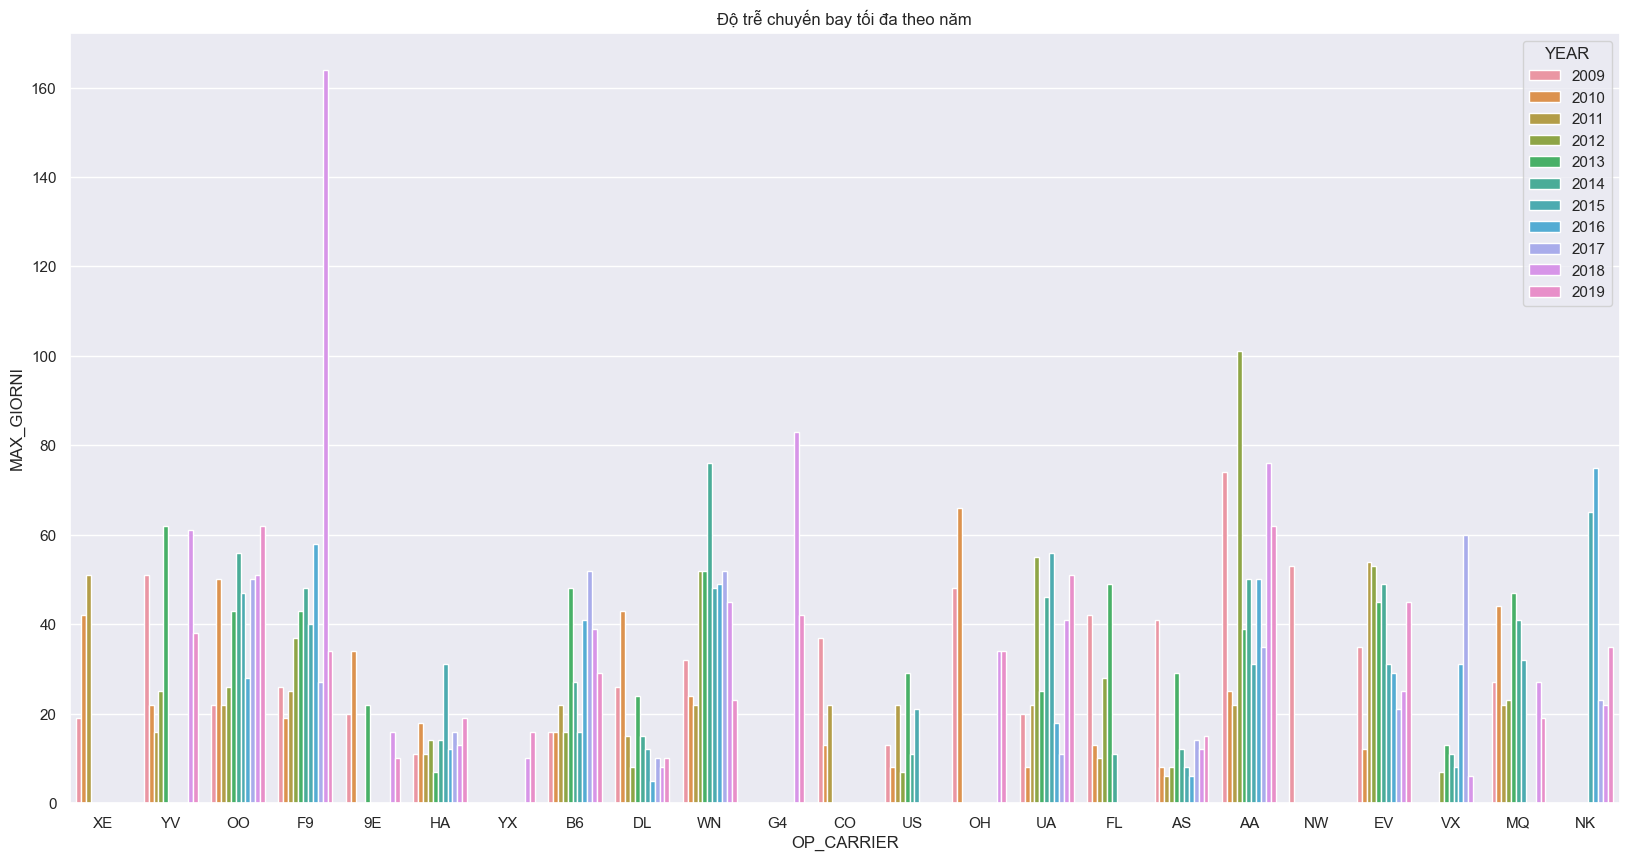

In [29]:
rows = session.execute("SELECT * FROM max_consec_delay_year")
results = rows._current_rows
plt.title('Độ trễ chuyến bay tối đa theo năm')
sns.barplot(data=results, x="OP_CARRIER", y="MAX_GIORNI", hue="YEAR")
plt.show()

## Distance Analysis

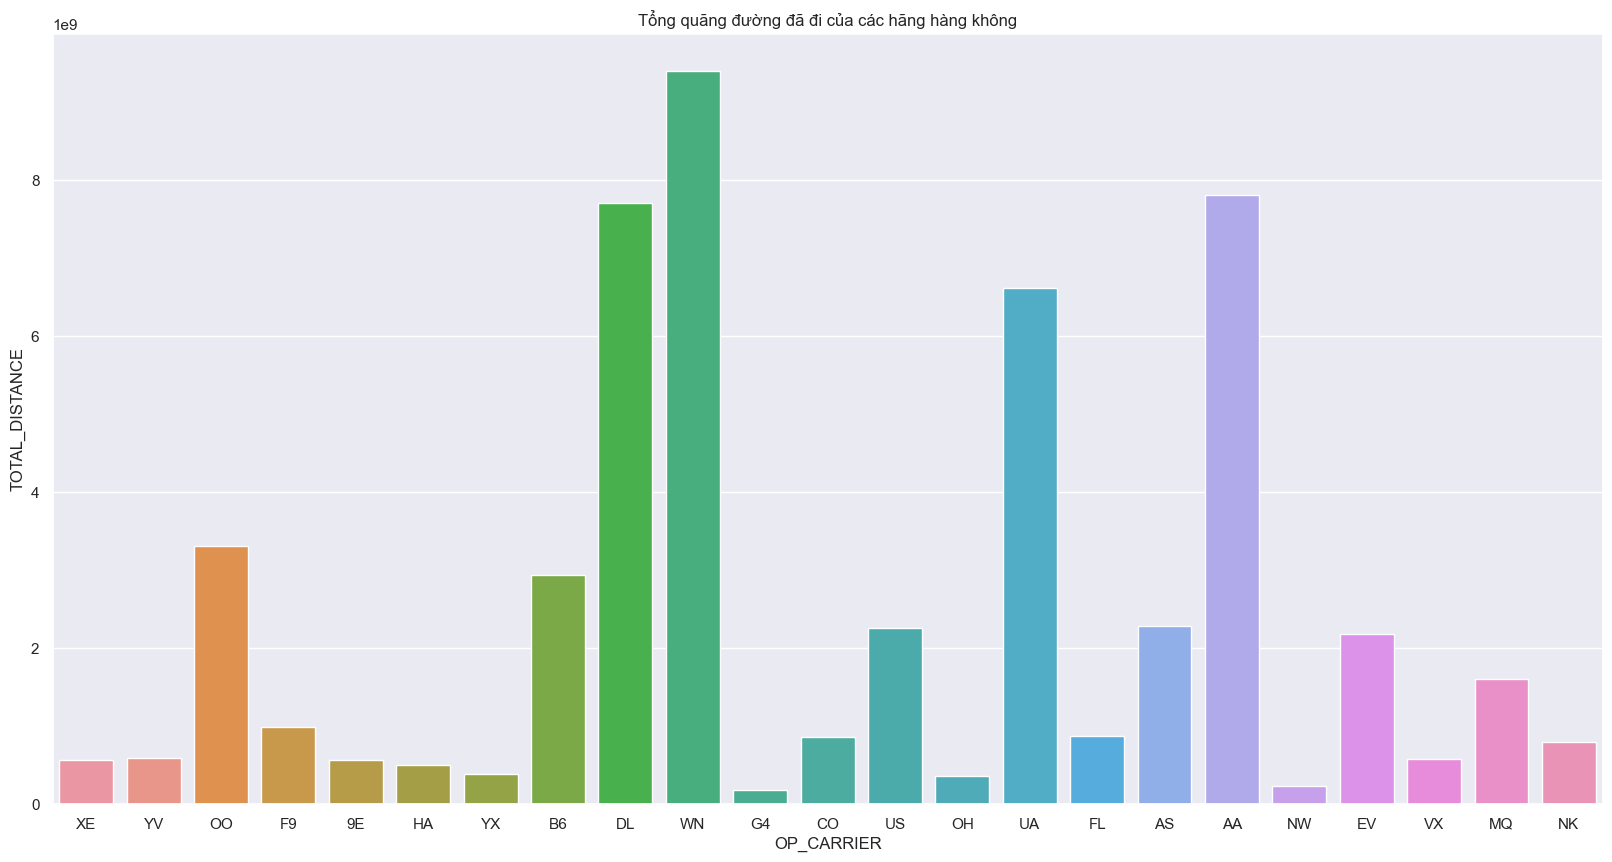

In [9]:
rows = session.execute("SELECT * FROM dist_total")
results = rows._current_rows
sns.barplot(data=results, x="OP_CARRIER", y="TOTAL_DISTANCE")
plt.title("Tổng quãng đường đã đi của các hãng hàng không")
plt.show()

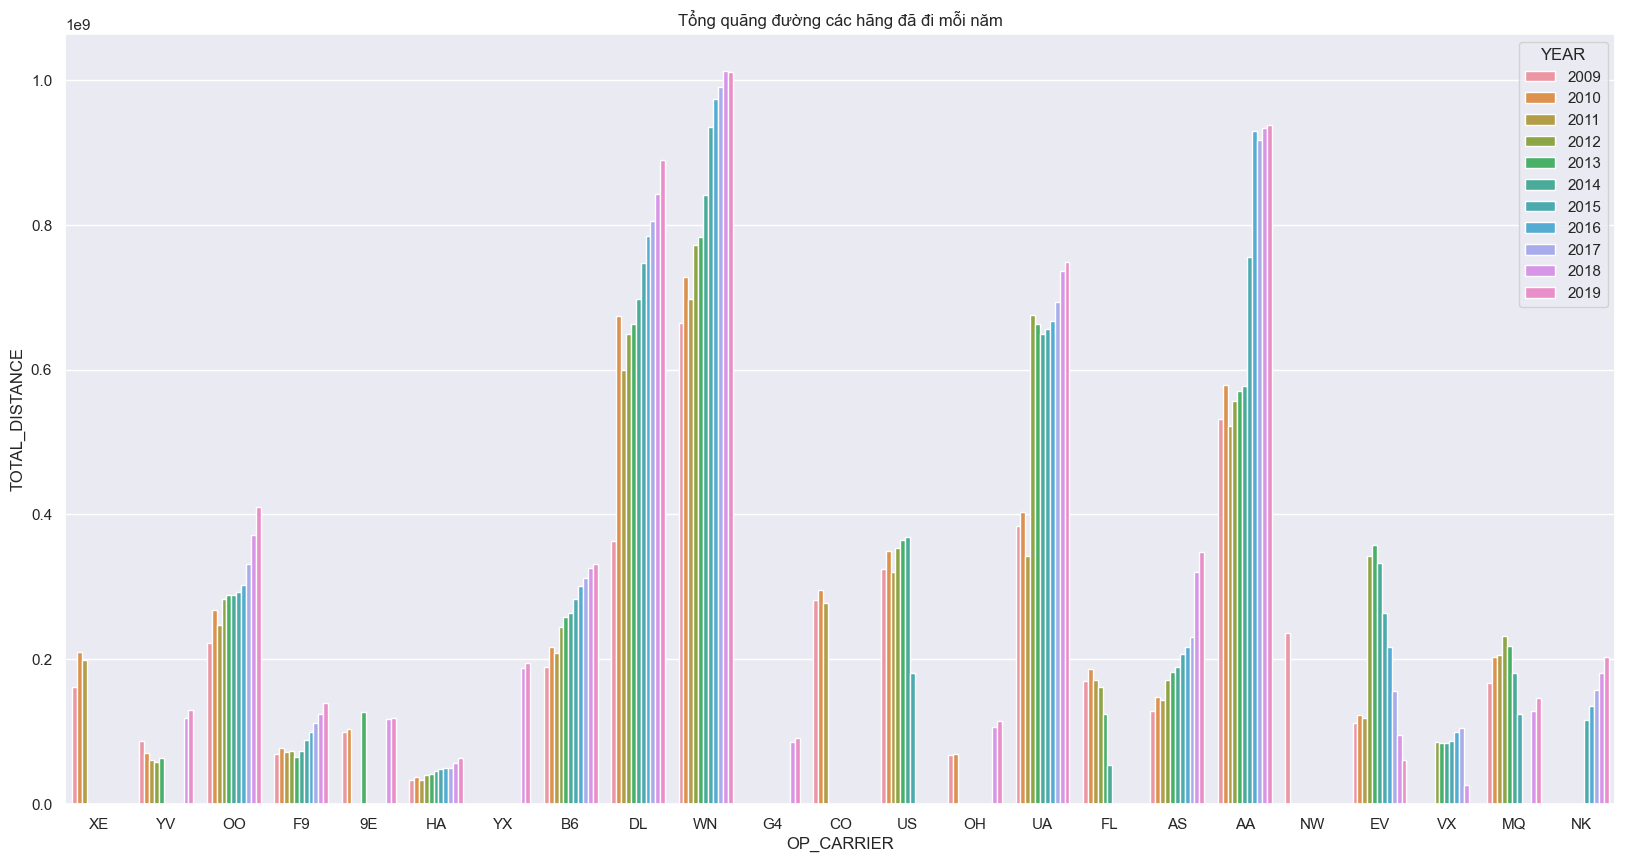

In [10]:
rows = session.execute("SELECT * FROM dist_year")
results = rows._current_rows
sns.barplot(data=results, x="OP_CARRIER", y="TOTAL_DISTANCE", hue="YEAR")
plt.title("Tổng quãng đường các hãng đã đi mỗi năm")
plt.show()

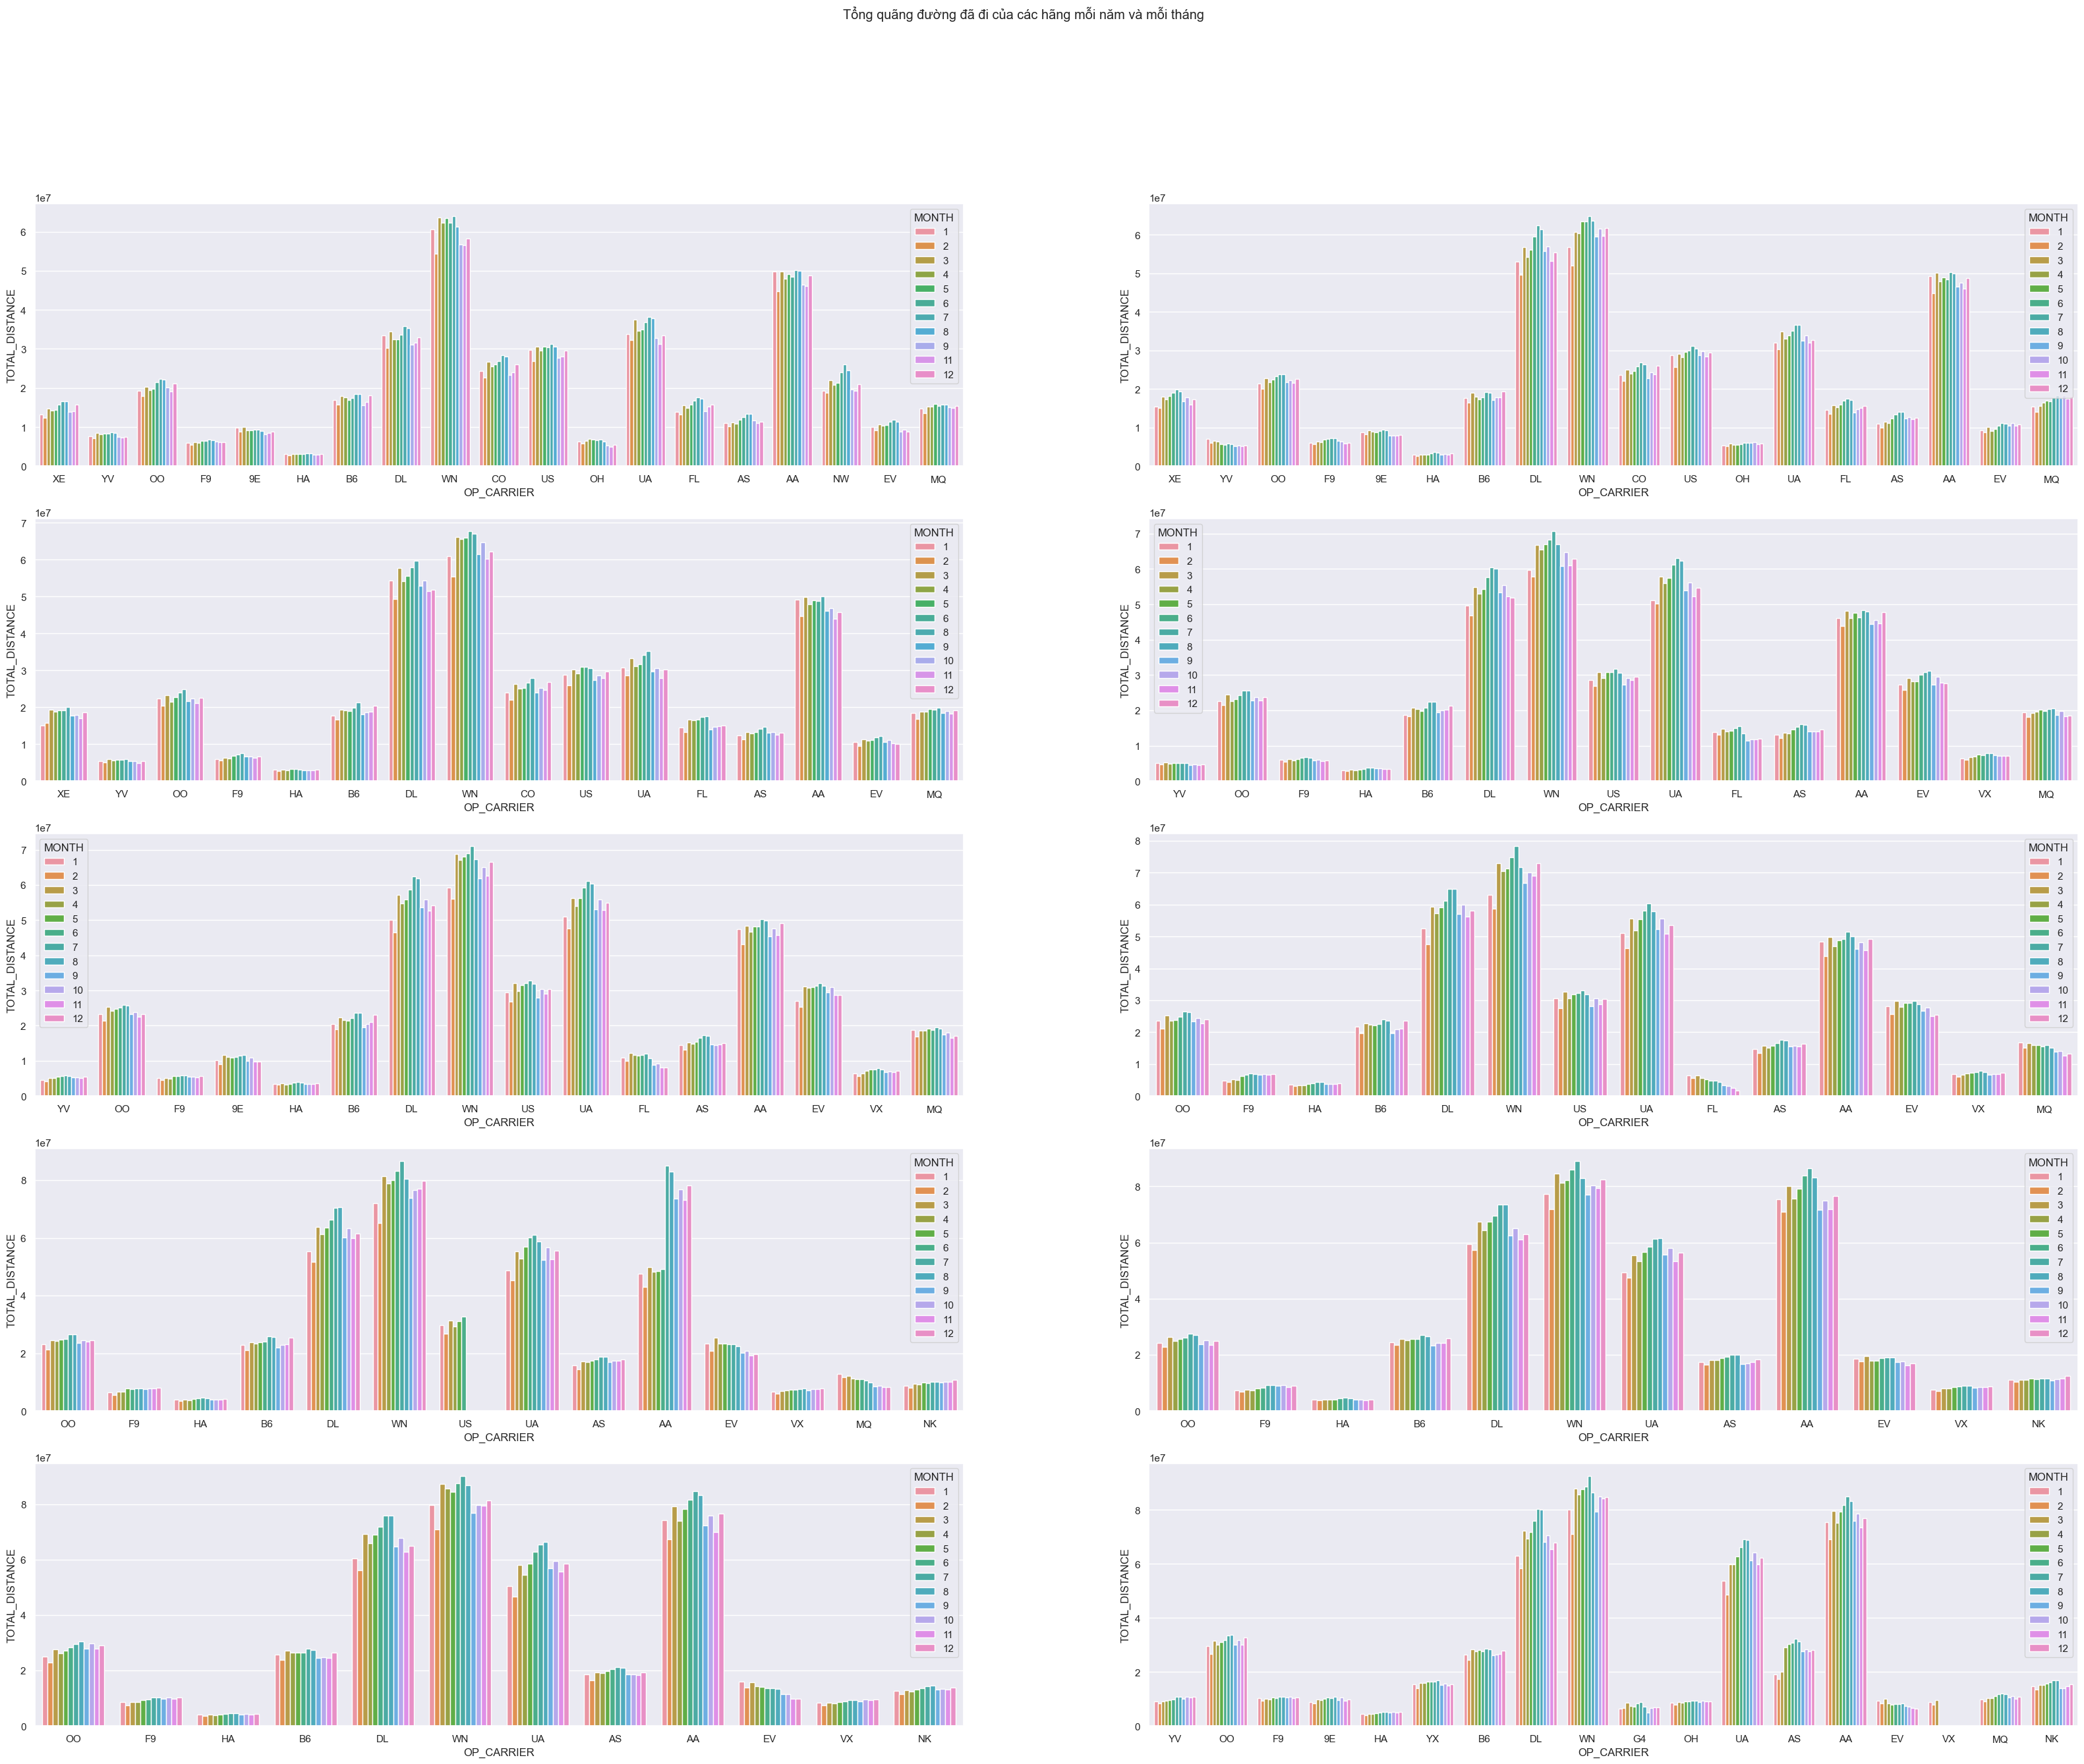

In [11]:
rows = session.execute("SELECT * FROM dist_year_month")
results = rows._current_rows
fig, axes = plt.subplots(5, 2, figsize=(40, 30))

fig.suptitle('Tổng quãng đường đã đi của các hãng mỗi năm và mỗi tháng')

sns.barplot(ax=axes[0, 0], data=results[dist_year_month["YEAR"] == 2009], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
sns.barplot(ax=axes[0, 1], data=results[dist_year_month["YEAR"] == 2010], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
sns.barplot(ax=axes[1, 0], data=results[dist_year_month["YEAR"] == 2011], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
sns.barplot(ax=axes[1, 1], data=results[dist_year_month["YEAR"] == 2012], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
sns.barplot(ax=axes[2, 0], data=results[dist_year_month["YEAR"] == 2013], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
sns.barplot(ax=axes[2, 1], data=results[dist_year_month["YEAR"] == 2014], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
sns.barplot(ax=axes[3, 0], data=results[dist_year_month["YEAR"] == 2015], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
sns.barplot(ax=axes[3, 1], data=results[dist_year_month["YEAR"] == 2016], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
sns.barplot(ax=axes[4, 0], data=results[dist_year_month["YEAR"] == 2017], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
sns.barplot(ax=axes[4, 1], data=results[dist_year_month["YEAR"] == 2018], x='OP_CARRIER', y='TOTAL_DISTANCE', hue="MONTH")
plt.show()

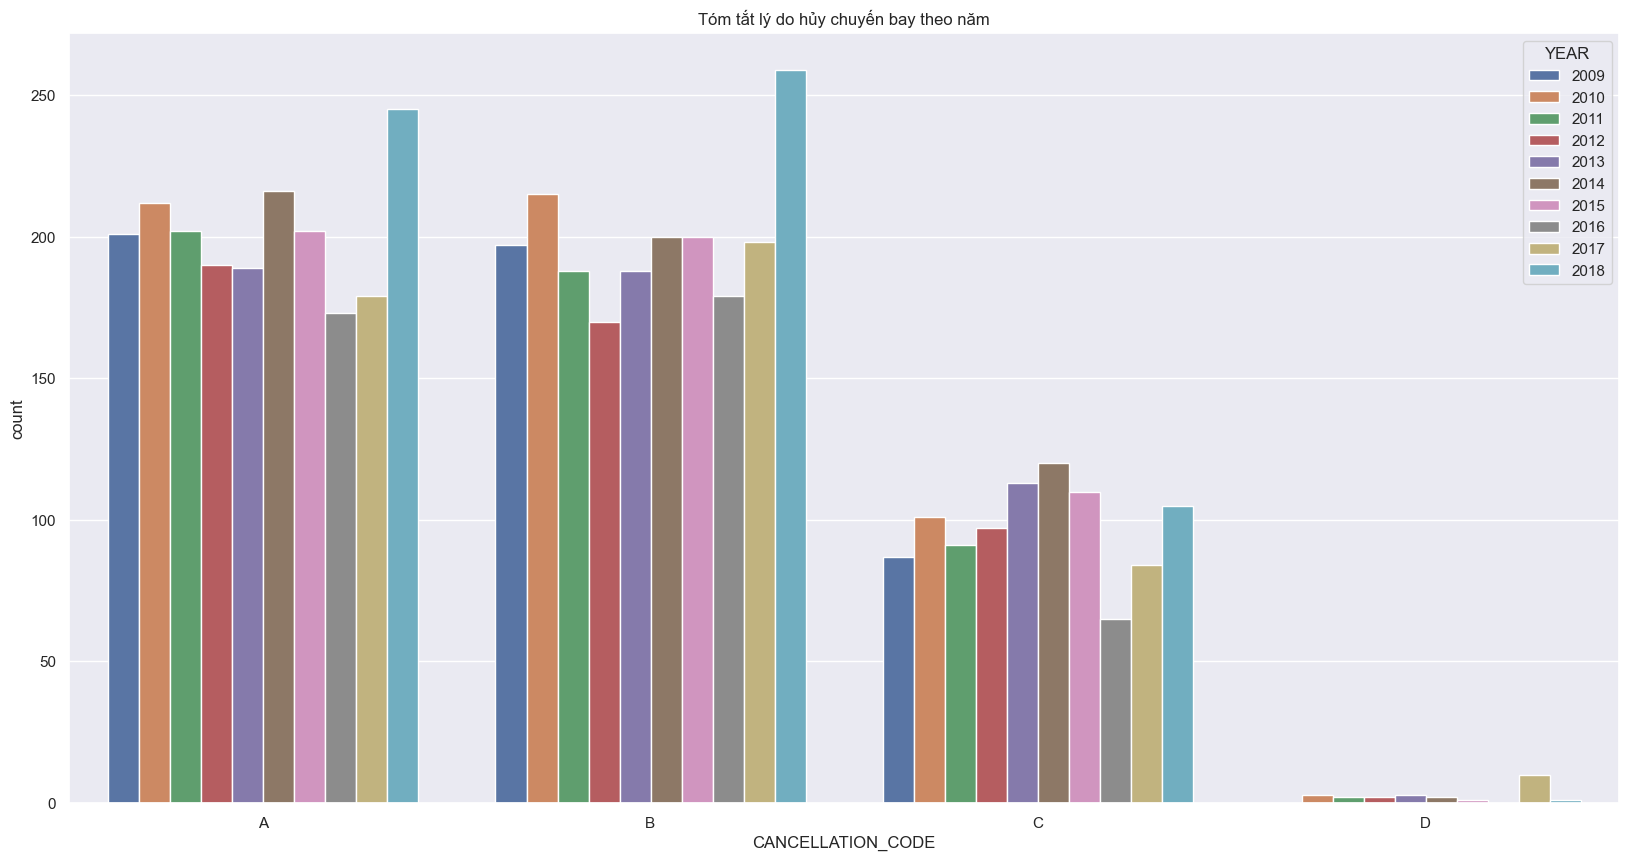

In [27]:
rows = session.execute("SELECT * FROM src_dest_canc_code")
a = rows._current_rows
plt.title('Tóm tắt lý do hủy chuyến bay theo năm')
sns.countplot(data=a, x="CANCELLATION_CODE", hue="YEAR")
plt.show()

## Delay Analysis

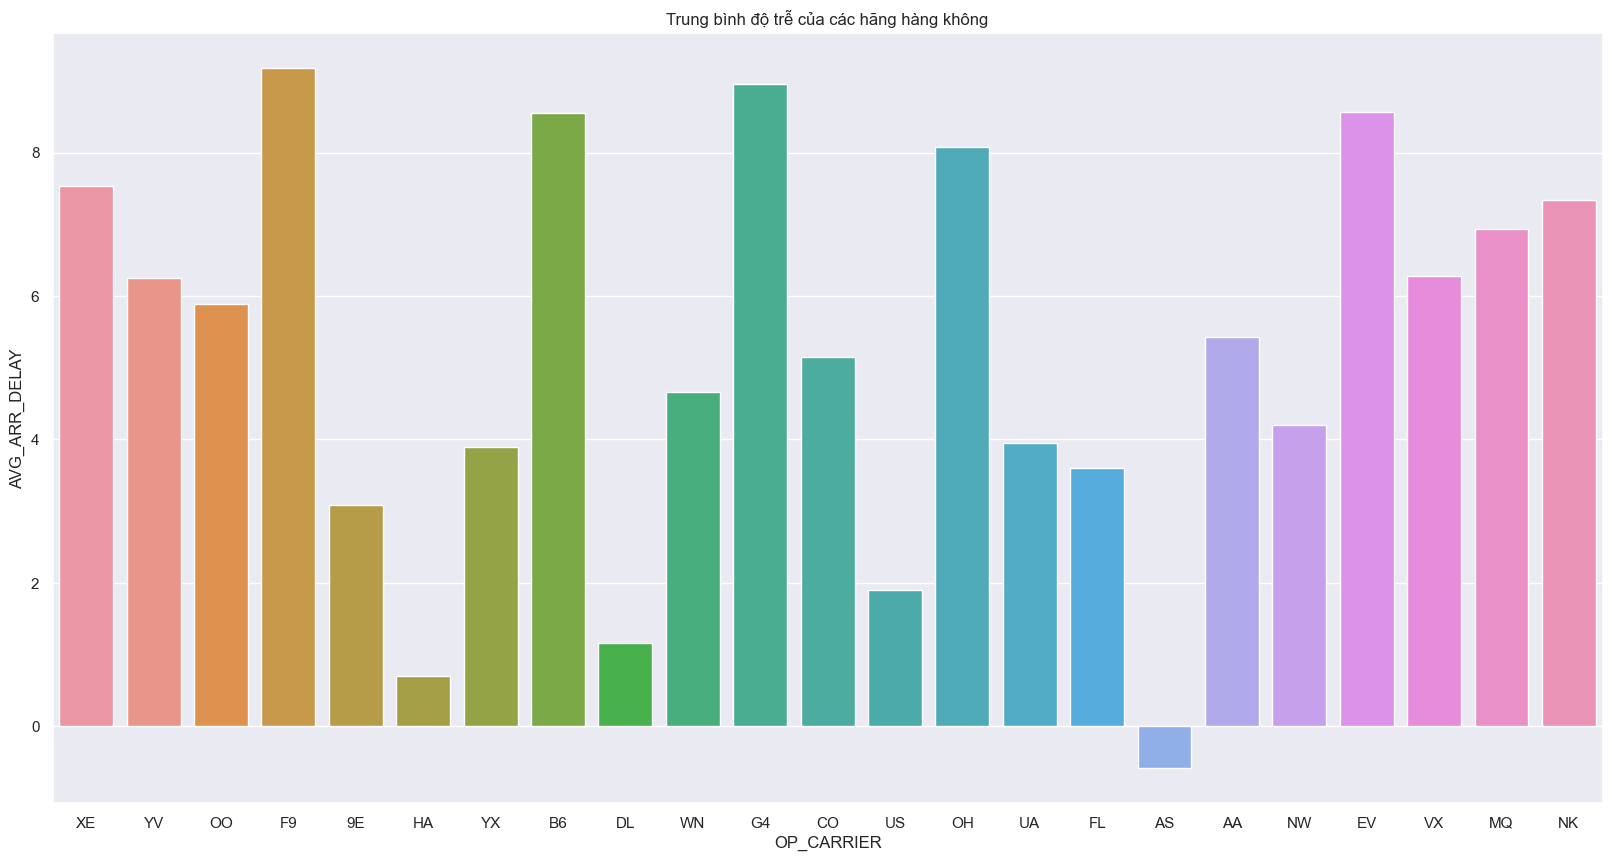

In [26]:
rows = session.execute("SELECT * FROM delay_total")
results = rows._current_rows
plt.title('Trung bình độ trễ của các hãng hàng không')
sns.barplot(data=results, x="OP_CARRIER", y = "AVG_ARR_DELAY")
plt.show()

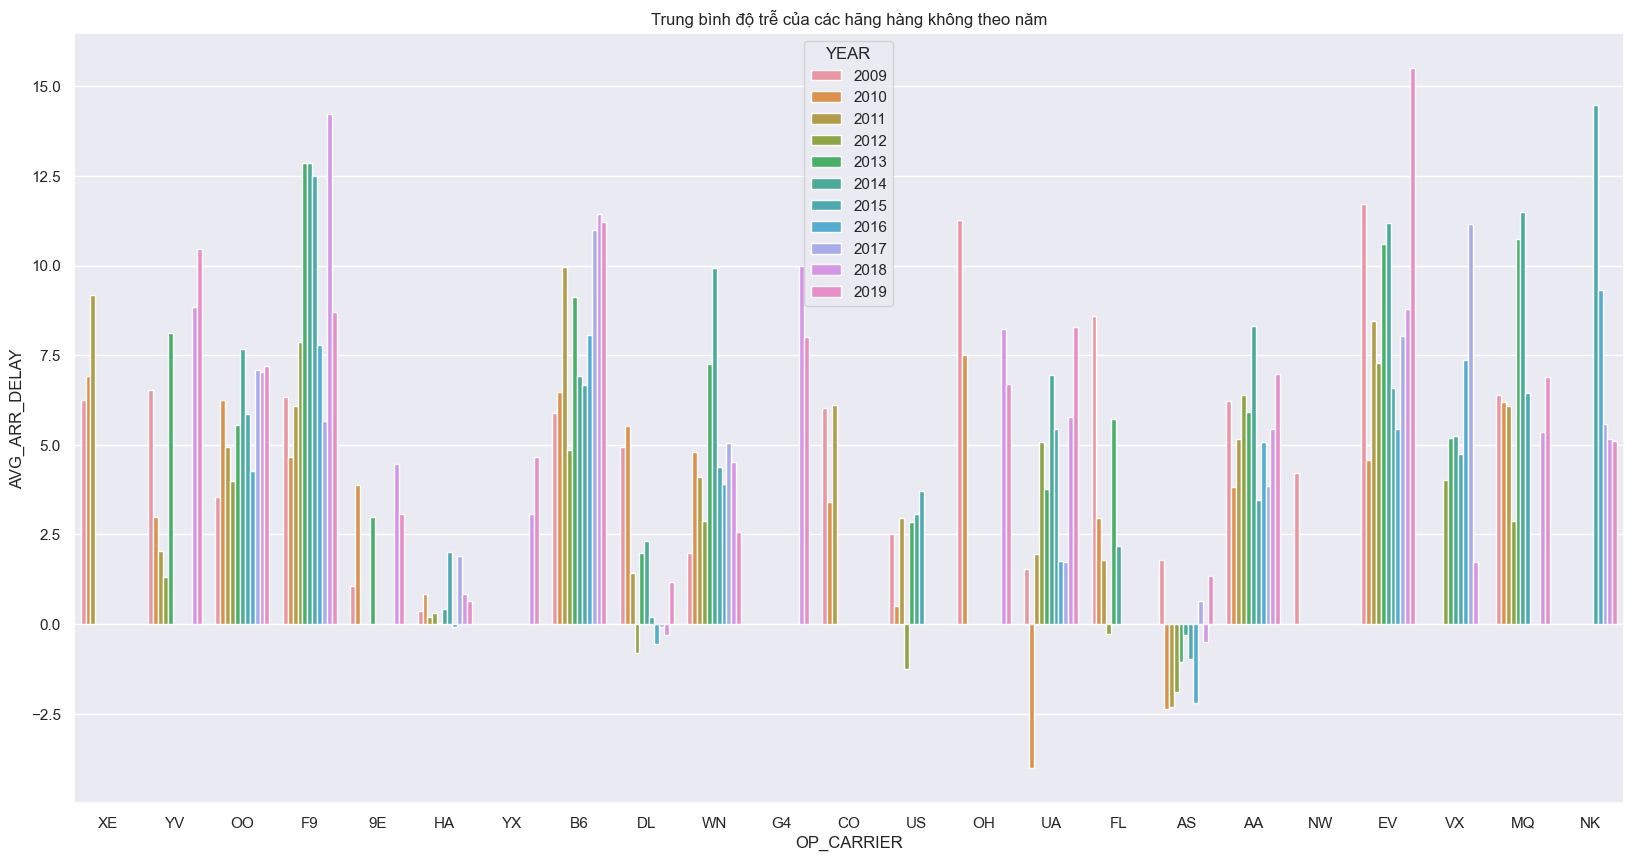

In [28]:
rows = session.execute("SELECT * FROM delay_year")
results = rows._current_rows
plt.title('Trung bình độ trễ của các hãng hàng không theo năm')
sns.barplot(data=results, x="OP_CARRIER", y = "AVG_ARR_DELAY", hue="YEAR")
plt.show()

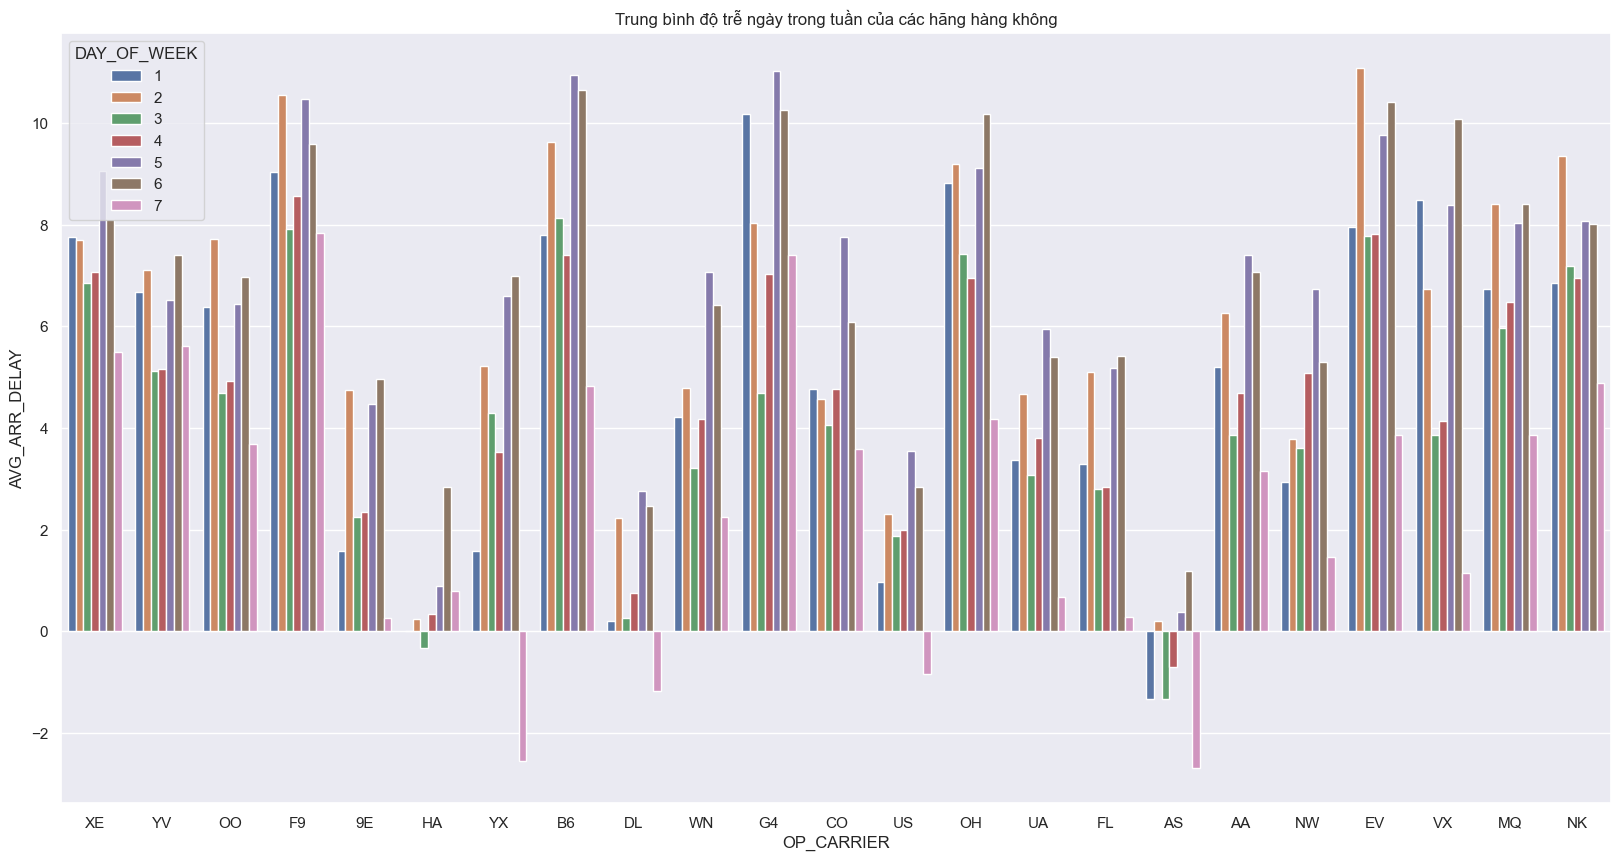

In [25]:
rows = session.execute("SELECT * FROM delay_dayofweek")
results = rows._current_rows
plt.title('Trung bình độ trễ ngày trong tuần của các hãng hàng không')
sns.barplot(data=results, x="OP_CARRIER", y = "AVG_ARR_DELAY", hue="DAY_OF_WEEK")
plt.show()

## Cancellation Analysis

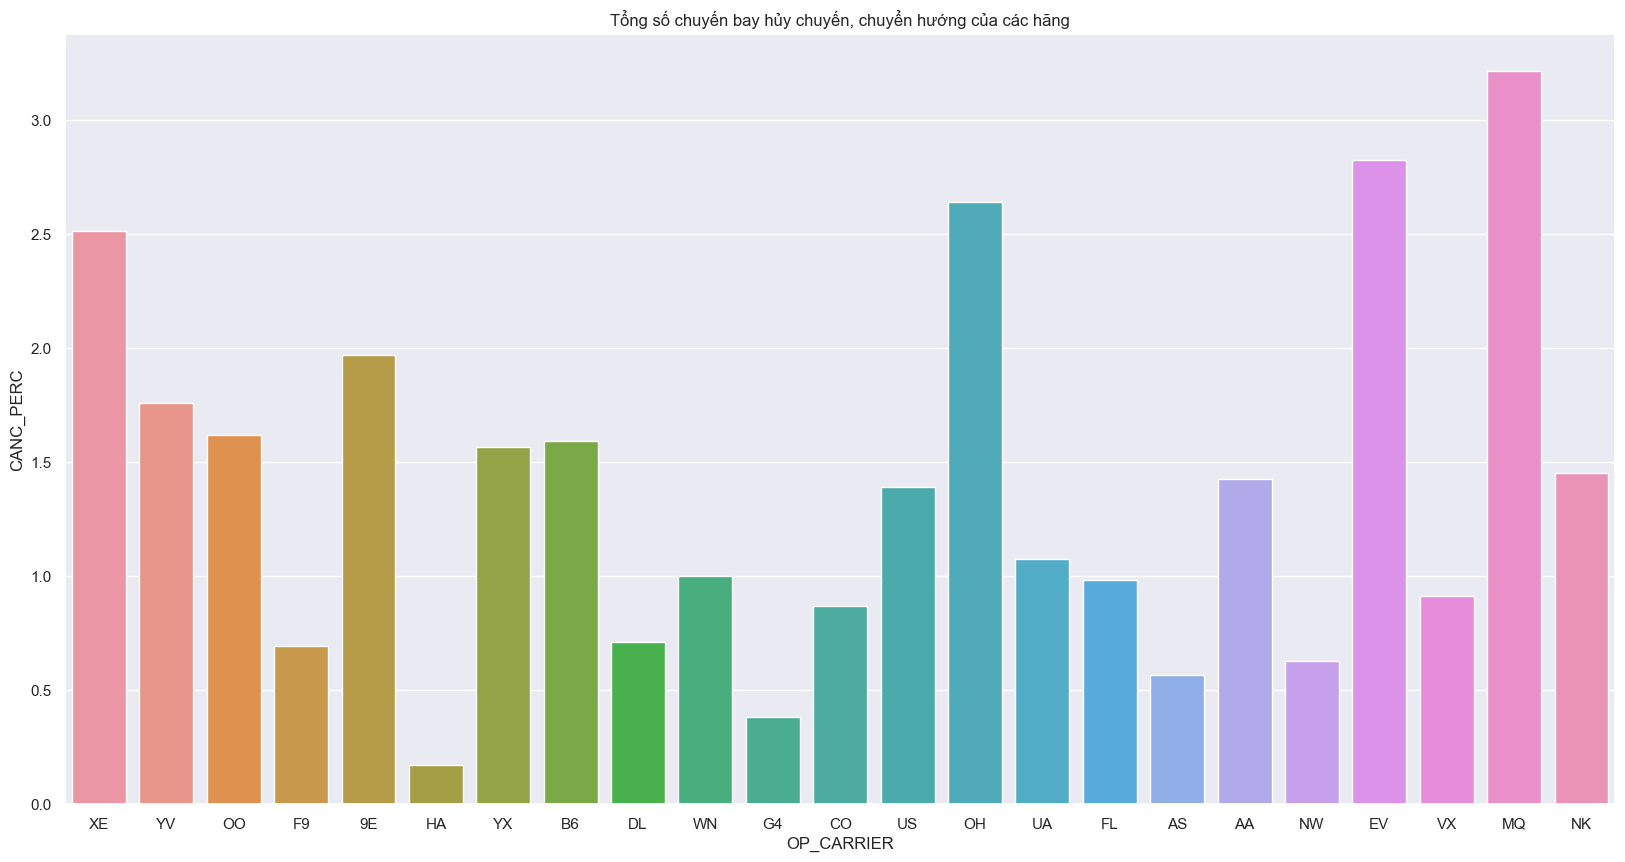

In [24]:
rows = session.execute("SELECT * FROM cancellation_diverted_total")
results = rows._current_rows
plt.title('Tổng số chuyến bay hủy chuyến, chuyển hướng của các hãng')
sns.barplot(data=results, x="OP_CARRIER", y = "CANC_PERC")
plt.show()

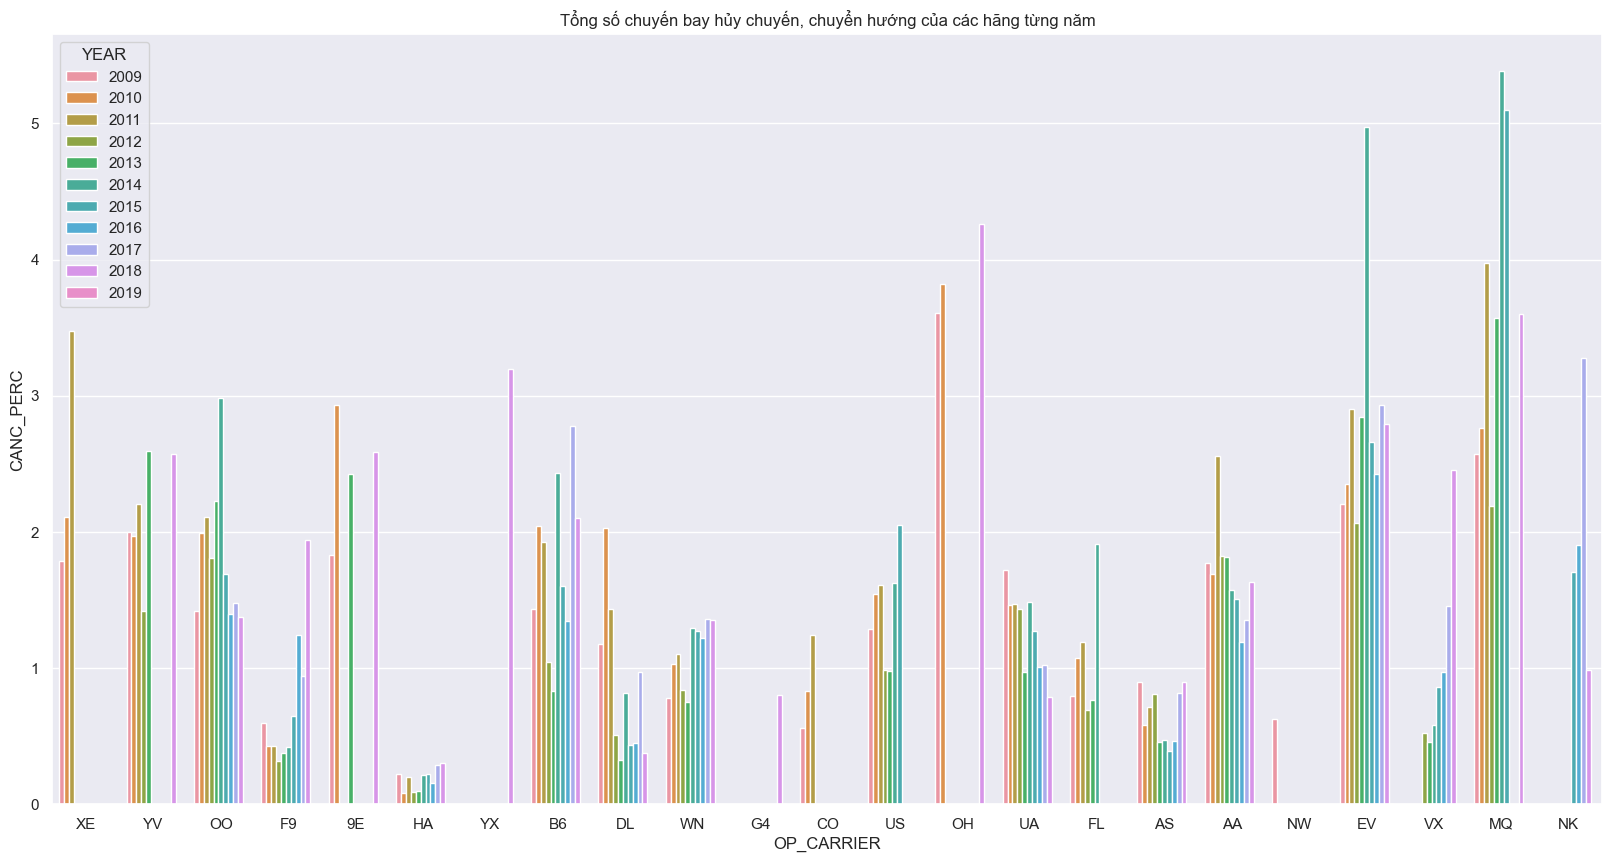

In [23]:
rows = session.execute("SELECT * FROM cancellation_diverted_year")
results = rows._current_rows
plt.title('Tổng số chuyến bay hủy chuyến, chuyển hướng của các hãng từng năm')
sns.barplot(data=results, x="OP_CARRIER", y = "CANC_PERC", hue = "YEAR")
plt.show()

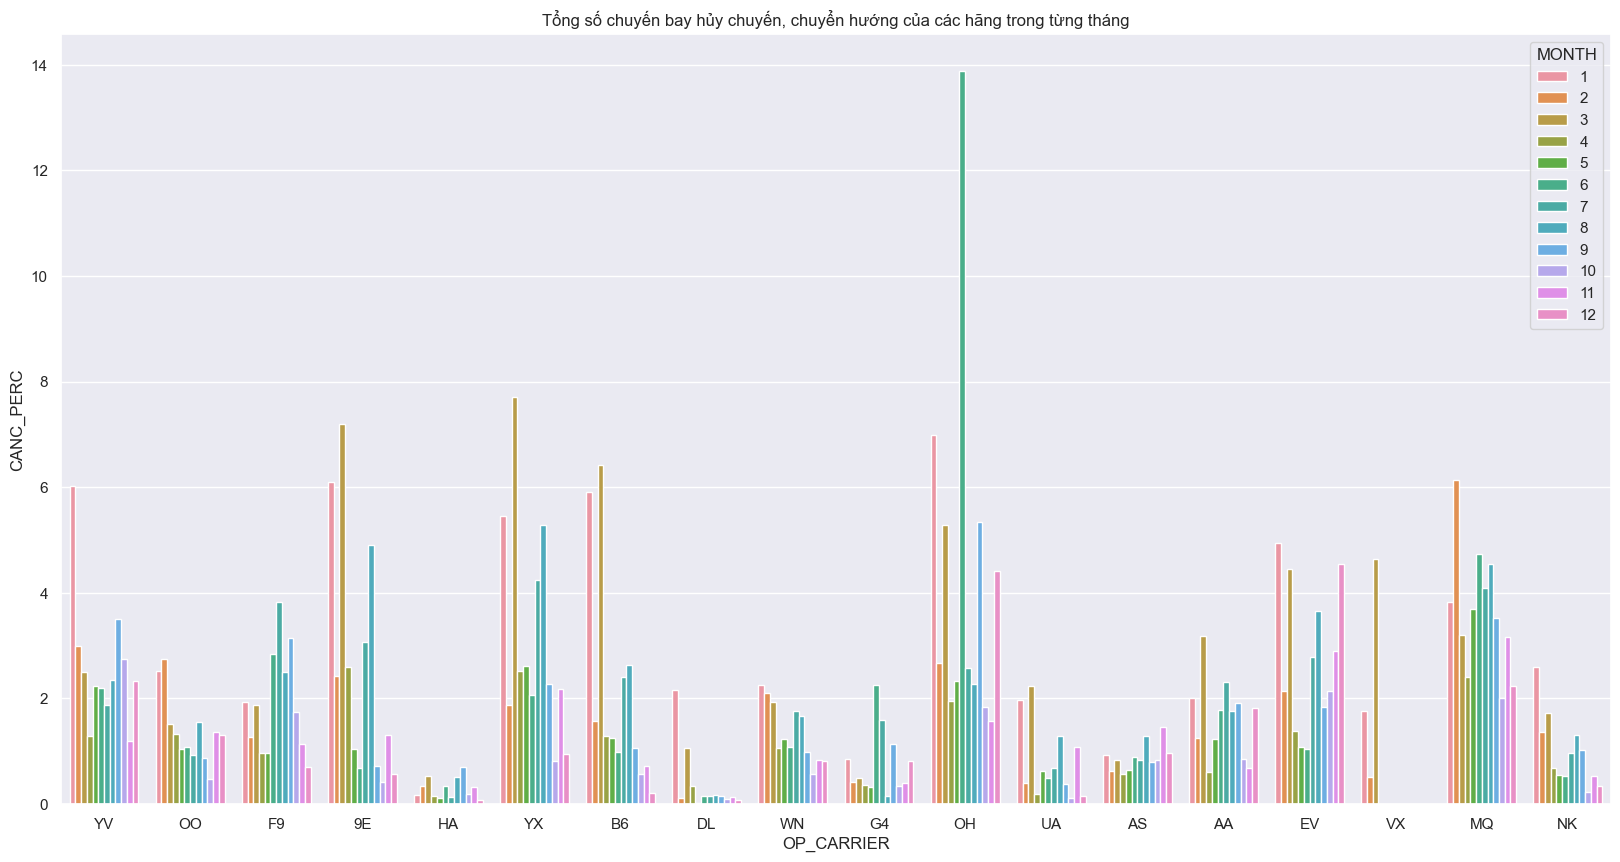

In [22]:
rows = session.execute("SELECT * FROM cancellation_diverted_year_month")
results = rows._current_rows
plt.title('Tổng số chuyến bay hủy chuyến, chuyển hướng của các hãng trong từng tháng')
results = results[results["YEAR"]==2018]
sns.barplot(data=results, x="OP_CARRIER", y = "CANC_PERC", hue = "MONTH")
plt.show()

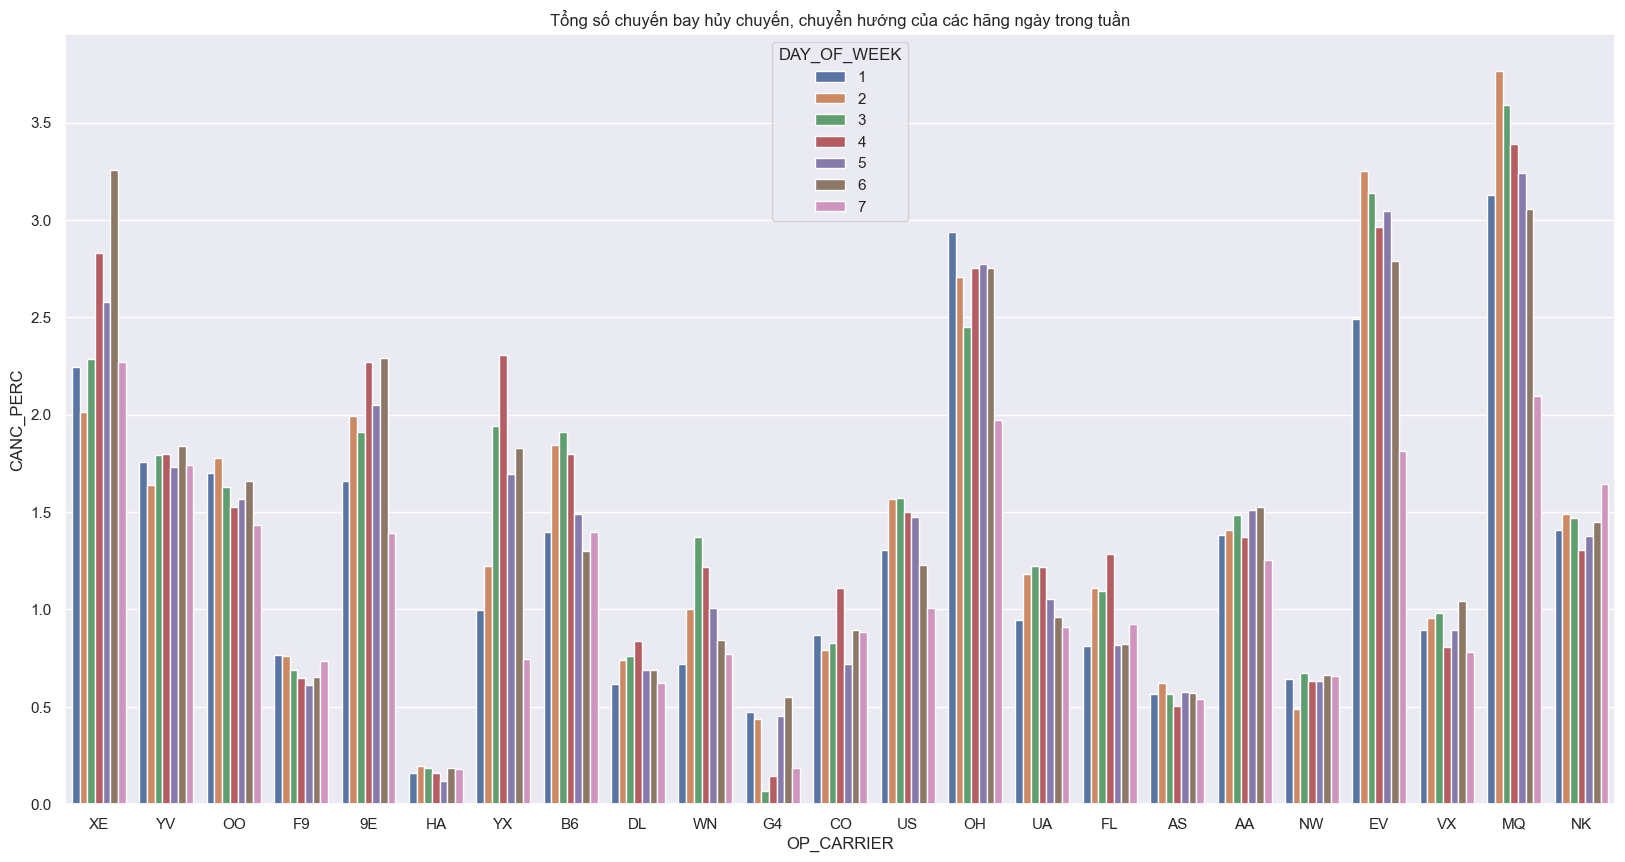

In [21]:
rows = session.execute("SELECT * FROM cancellation_diverted_dayofweek")
results = rows._current_rows
plt.title('Tổng số chuyến bay hủy chuyến, chuyển hướng của các hãng ngày trong tuần')
sns.barplot(data=results, x="OP_CARRIER", y = "CANC_PERC", hue = "DAY_OF_WEEK")
plt.show()